In [12]:
import freud
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

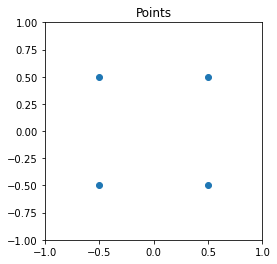

In [13]:
points = np.array([[-0.5, -0.5, 0], [0.5, -0.5, 0], [-0.5, 0.5, 0], [0.5, 0.5, 0]])
plt.scatter(points[:, 0], points[:, 1])
plt.title("Points")
plt.xlim((-1, 1))
plt.ylim((-1, 1))
plt.gca().set_aspect("equal")
plt.show()

In [14]:
L = 2
box = freud.box.Box.square(L)
voro = freud.locality.Voronoi()

In [15]:
cells = voro.compute((box, points)).polytopes
print(cells)

[array([[-1., -1.,  0.],
       [ 0., -1.,  0.],
       [ 0.,  0.,  0.],
       [-1.,  0.,  0.]]), array([[ 0., -1.,  0.],
       [ 1., -1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  0.]]), array([[-1.00000000e+00, -1.11022302e-16,  0.00000000e+00],
       [ 0.00000000e+00, -1.11022302e-16,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-1.00000000e+00,  1.00000000e+00,  0.00000000e+00]]), array([[ 0.00000000e+00, -1.11022302e-16,  0.00000000e+00],
       [ 1.00000000e+00, -1.11022302e-16,  0.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00]])]


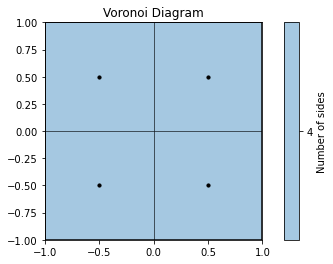

In [16]:
plt.figure()
ax = plt.gca()
voro.plot(ax=ax)
ax.scatter(points[:, 0], points[:, 1], s=10, c="k")
plt.show()

In [17]:
def hexagonal_lattice(rows=3, cols=3, noise=0, seed=None):
    if seed is not None:
        np.random.seed(seed)
    # Assemble a hexagonal lattice
    points = []
    for row in range(rows * 2):
        for col in range(cols):
            x = (col + (0.5 * (row % 2))) * np.sqrt(3)
            y = row * 0.5
            points.append((x, y, 0))
    points = np.asarray(points)
    points += np.random.multivariate_normal(
        mean=np.zeros(3), cov=np.eye(3) * noise, size=points.shape[0]
    )
    # Set z=0 again for all points after adding Gaussian noise
    points[:, 2] = 0

    # Wrap the points into the box
    box = freud.box.Box(Lx=cols * np.sqrt(3), Ly=rows, is2D=True)
    points = box.wrap(points)
    return box, points

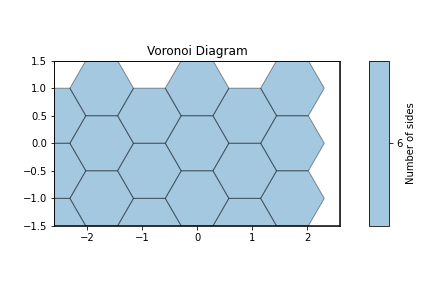

<Figure size 432x288 with 0 Axes>

In [18]:
# Compute the Voronoi diagram and plot
box, points = hexagonal_lattice()
voro = freud.locality.Voronoi()
voro.compute((box, points))
voro

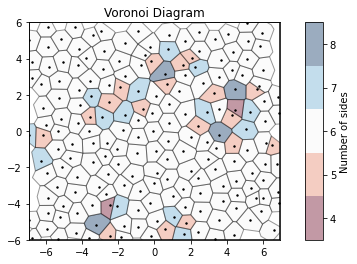

In [19]:
# Compute the Voronoi diagram
box, points = hexagonal_lattice(rows=12, cols=8, noise=0.03, seed=2)
voro = freud.locality.Voronoi()
voro.compute((box, points))

# Plot Voronoi with points and a custom cmap
plt.figure()
ax = plt.gca()
voro.plot(ax=ax, cmap="RdBu")
ax.scatter(points[:, 0], points[:, 1], s=2, c="k")
plt.show()

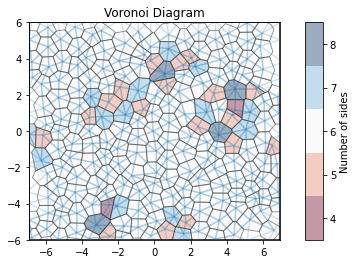

In [20]:
nlist = voro.nlist
line_data = np.asarray(
    [[points[i], points[i] + box.wrap(points[j] - points[i])] for i, j in nlist]
)[:, :, :2]
line_collection = matplotlib.collections.LineCollection(line_data, alpha=0.2)
plt.figure()
ax = plt.gca()
voro.plot(ax=ax, cmap="RdBu")
ax.add_collection(line_collection)
plt.show()